In [1]:
%load_ext autoreload
%autoreload 2
import sys
import os
module_path = os.path.abspath(os.path.join('..'))
if module_path not in sys.path:
    sys.path.append(module_path+"/src")
import helpers as hlp

In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split

In [3]:
# Set plot sizes
SMALL_SIZE = 22
MEDIUM_SIZE = 24
BIGGER_SIZE = 26
BIGGEST_SIZE = 28

plt.rc('font', size=SMALL_SIZE)          # controls default text sizes
plt.rc('axes', titlesize=SMALL_SIZE)     # fontsize of the axes title
plt.rc('axes', labelsize=MEDIUM_SIZE)    # fontsize of the x and y labels
plt.rc('xtick', labelsize=SMALL_SIZE)    # fontsize of the tick labels
plt.rc('ytick', labelsize=SMALL_SIZE)    # fontsize of the tick labels
plt.rc('legend', fontsize=SMALL_SIZE)    # legend fontsize
plt.rc('figure', titlesize=BIGGEST_SIZE)  # fontsize of the figure title

# Load & Merge CSV Data

In [4]:
aws_data_dir = '../data/web_scraped/aws_final/'

# Use helper function to load and merge CSVs from folders in above dir
df_all_hotels = hlp.merge_csv_mult_dir(aws_data_dir)

Folders: ['Honolulu-Hawaii.pg1', 'New_York_City-New_York-pg1', 'Honolulu-Hawaii.pg3', 'Tokyo-Kanto-pg1', 'Honolulu-Hawaii.pg2', 'Honolulu-Hawaii.pg4']


In [5]:
df_all_hotels.shape

(212155, 10)

In [6]:
df_all_hotels.head()

,review_id,url,hotel_name,review_date,review_body,user_location,helpful_vote,rating,csv,folder
0,752691107,https://www.tripadvisor.com/Hotel_Review-g6098...,Waikiki Beachcomber by Outrigger,"April 16, 2020",We approached the concierge for help to get s...,"Taupo, New Zealand",8,4.0,Waikiki_Beachcomber_by_Outrigger-Honolulu_Oahu...,Honolulu-Hawaii.pg1
1,678025463,https://www.tripadvisor.com/Hotel_Review-g6098...,Waikiki Beachcomber by Outrigger,"June 1, 2019",We have just returned home from spending a fun...,"Peakhurst, Australia",5,5.0,Waikiki_Beachcomber_by_Outrigger-Honolulu_Oahu...,Honolulu-Hawaii.pg1
2,751366035,https://www.tripadvisor.com/Hotel_Review-g6098...,Waikiki Beachcomber by Outrigger,"March 18, 2020","Perfect location, beautiful room with well app...","Melbourne, Australia",0,5.0,Waikiki_Beachcomber_by_Outrigger-Honolulu_Oahu...,Honolulu-Hawaii.pg1
3,751346529,https://www.tripadvisor.com/Hotel_Review-g6098...,Waikiki Beachcomber by Outrigger,"March 18, 2020",Kristina works in reception and she was so kin...,"Hollywood, California",1,5.0,Waikiki_Beachcomber_by_Outrigger-Honolulu_Oahu...,Honolulu-Hawaii.pg1
4,751269969,https://www.tripadvisor.com/Hotel_Review-g6098...,Waikiki Beachcomber by Outrigger,"March 17, 2020",We spent a week at the Waikiki Beachcomber and...,"Salmon Arm, Canada",4,4.0,Waikiki_Beachcomber_by_Outrigger-Honolulu_Oahu...,Honolulu-Hawaii.pg1


In [7]:
df_all_hotels.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 212155 entries, 0 to 212154
Data columns (total 10 columns):
 #   Column         Non-Null Count   Dtype  
---  ------         --------------   -----  
 0   review_id      212155 non-null  int64  
 1   url            212155 non-null  object 
 2   hotel_name     212155 non-null  object 
 3   review_date    212155 non-null  object 
 4   review_body    212155 non-null  object 
 5   user_location  184157 non-null  object 
 6   helpful_vote   212155 non-null  int64  
 7   rating         212155 non-null  float64
 8   csv            212155 non-null  object 
 9   folder         212155 non-null  object 
dtypes: float64(1), int64(2), object(7)
memory usage: 16.2+ MB


In [8]:
# Check for duplicate rows
dup_rows = df_all_hotels[df_all_hotels.duplicated()].count()
print('Number of duplicate rows:\n\n{}'.format(dup_rows))

Number of duplicate rows:

review_id        0
url              0
hotel_name       0
review_date      0
review_body      0
user_location    0
helpful_vote     0
rating           0
csv              0
folder           0
dtype: int64


In [9]:
# Get count, pct, and type of missing data (per column)
hlp.get_nulls(df_all_hotels)

,Total,Percent,Type
user_location,27998,0.13197,object
folder,0,0.00000,object
csv,0,0.00000,object
rating,0,0.00000,float64
helpful_vote,0,0.00000,int64
review_body,0,0.00000,object
review_date,0,0.00000,object
hotel_name,0,0.00000,object
url,0,0.00000,object
review_id,0,0.00000,int64


# Clean & Prep Data

In [10]:
df_all_hotels_cleaned = df_all_hotels.copy()

# Use helper function to do clean & prep
df_all_hotels_cleaned = hlp.clean_and_prep(df_all_hotels_cleaned)

df_all_hotels_cleaned.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 212155 entries, 0 to 212154
Data columns (total 14 columns):
 #   Column         Non-Null Count   Dtype  
---  ------         --------------   -----  
 0   review_id      212155 non-null  int64  
 1   url            212155 non-null  object 
 2   hotel_name     212155 non-null  object 
 3   review_date    212155 non-null  object 
 4   review_body    212155 non-null  object 
 5   user_location  212155 non-null  object 
 6   helpful_vote   212155 non-null  int64  
 7   rating         212155 non-null  float64
 8   csv            212155 non-null  object 
 9   folder         212155 non-null  object 
 10  City           212155 non-null  object 
 11  polarity       212155 non-null  float64
 12  sentiment_int  212155 non-null  int64  
 13  sentiment      212155 non-null  object 
dtypes: float64(2), int64(3), object(9)
memory usage: 24.3+ MB


# EDA

In [11]:
df_all_hotels_cleaned.sample(15)

,review_id,url,hotel_name,review_date,review_body,user_location,helpful_vote,rating,csv,folder,City,polarity,sentiment_int,sentiment
107943,81413871,https://www.tripadvisor.com/Hotel_Review-g6098...,Hotel Renew,"September 28, 2010",Hotel Renew can easily be missed located besid...,vancouver,1,5.0,Hotel_Renew-Honolulu_Oahu_Hawaii__en.csv,Honolulu-Hawaii.pg3,Honolulu,1.0,2,positive
115536,268935315,https://www.tripadvisor.com/Hotel_Review-g6098...,Luana Waikiki Hotel & Suites,"April 29, 2015","Luana is good value for money, but rather tire...","Melbourne, Australia",38,3.0,Luana_Waikiki_Hotel_Suites-Honolulu_Oahu_Hawai...,Honolulu-Hawaii.pg3,Honolulu,0.5,1,neutral
192497,161094438,https://www.tripadvisor.com/Hotel_Review-g6098...,Ilikai Hotel & Luxury Suites,"May 18, 2013","We have stayed in Waikiki many times,usually n...","Sun City West, Arizona",9,5.0,Ilikai_Hotel_Luxury_Suites-Honolulu_Oahu_Hawai...,Honolulu-Hawaii.pg2,Honolulu,1.0,2,positive
93362,394753418,https://www.tripadvisor.com/Hotel_Review-g6076...,New York Hilton Midtown,"July 20, 2016",Just returned from 4 days at the HIlton. You a...,"Ann Arbor, Michigan",114,4.0,New_York_Hilton_Midtown-New_York_City_New_York...,New_York_City-New_York-pg1,New_York_City,1.0,2,positive
55057,72775541,https://www.tripadvisor.com/Hotel_Review-g6098...,OHANA Waikiki Malia by Outrigger,"July 28, 2010",We stayed at Ohana Waikiki Malia for one night...,"Vancouver, Canada",40,4.0,OHANA_Waikiki_Malia_by_Outrigger-Honolulu_Oahu...,Honolulu-Hawaii.pg1,Honolulu,1.0,2,positive
93813,361361462,https://www.tripadvisor.com/Hotel_Review-g6076...,New York Hilton Midtown,"April 3, 2016","As tourists, we already came to New York with ...",singapore,139,3.0,New_York_Hilton_Midtown-New_York_City_New_York...,New_York_City-New_York-pg1,New_York_City,0.5,1,neutral
194975,734804456,https://www.tripadvisor.com/Hotel_Review-g6098...,‘Alohilani Resort Waikiki Beach,"December 26, 2019",We spent there 3 nights. This hotel is located...,"Warsaw, Poland",41,5.0,Alohilani_Resort_Waikiki_Beach-Honolulu_Oahu_H...,Honolulu-Hawaii.pg2,Honolulu,1.0,2,positive
110787,459486544,https://www.tripadvisor.com/Hotel_Review-g6098...,Outrigger Waikiki Beach Resort,"February 13, 2017",I've been visiting Hawaii since I was a little...,"Bismarck, North Dakota",15,5.0,Outrigger_Waikiki_Beach_Resort-Honolulu_Oahu_H...,Honolulu-Hawaii.pg3,Honolulu,1.0,2,positive
128334,446208155,https://www.tripadvisor.com/Hotel_Review-g6098...,Hyatt Regency Waikiki Beach Resort & Spa,"December 17, 2016","Our stay at the Hyatt Regency, Waikiki was OUT...","Fremont, United States",0,5.0,Hyatt_Regency_Waikiki_Beach_Resort_Spa-Honolul...,Honolulu-Hawaii.pg3,Honolulu,1.0,2,positive
110644,486192296,https://www.tripadvisor.com/Hotel_Review-g6098...,Outrigger Waikiki Beach Resort,"May 21, 2017","From the moment we walked into the Outrigger, ...",benton,9,5.0,Outrigger_Waikiki_Beach_Resort-Honolulu_Oahu_H...,Honolulu-Hawaii.pg3,Honolulu,1.0,2,positive


In [12]:
# Print how many unique values each column has
hlp.print_unique_ct(df_all_hotels_cleaned)

Count of Unique Values per Column:

review_id: 212155
url: 42484
hotel_name: 149
review_date: 6248
review_body: 212124
user_location: 27830
helpful_vote: 799
rating: 5
csv: 149
folder: 6
City: 3
polarity: 3
sentiment_int: 3
sentiment: 3


In [13]:
df_all_hotels_cleaned.describe()

,review_id,helpful_vote,rating,polarity,sentiment_int
count,2.121550e+05,212155.000000,212155.000000,212155.000000,212155.000000
mean,3.485569e+08,30.036360,4.104650,0.837633,1.675266
std,2.108024e+08,192.647358,1.094571,0.321905,0.643809
min,2.824200e+05,0.000000,1.000000,0.000000,0.000000
25%,1.655966e+08,2.000000,4.000000,1.000000,2.000000
50%,3.260000e+08,9.000000,4.000000,1.000000,2.000000
75%,5.286325e+08,29.000000,5.000000,1.000000,2.000000
max,7.534573e+08,34443.000000,5.000000,1.000000,2.000000


Total Number of Reviews: 212155


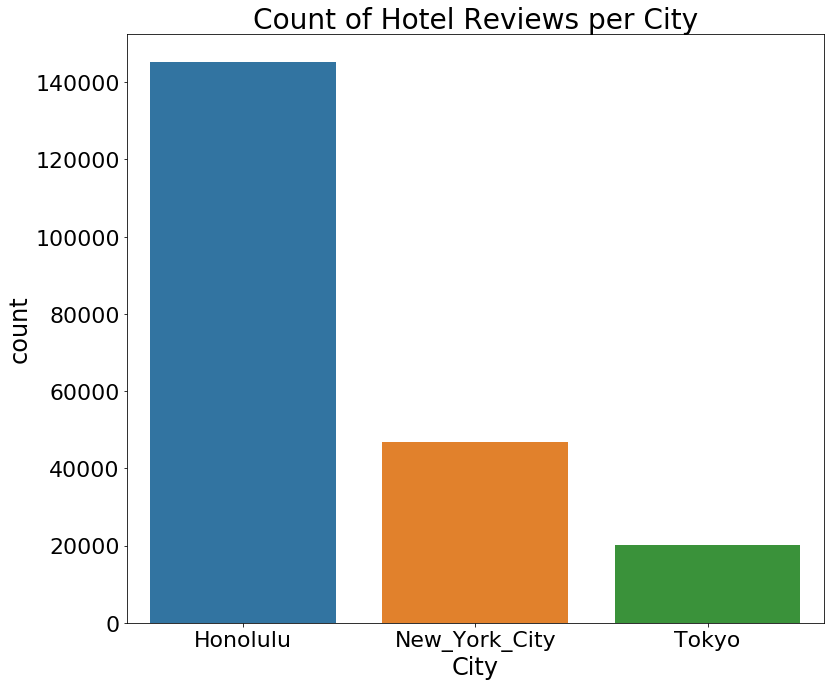

In [14]:
# Plot counts - Reviews per city
df = df_all_hotels_cleaned
print('Total Number of Reviews:', df.shape[0])

fig, ax = plt.subplots(figsize=(12,10))
plot = sns.countplot(data=df, x='City', ax=ax, order = df['City'].value_counts().index)
ax.set_title('Count of Hotel Reviews per City', size=BIGGEST_SIZE)
ax.set_xlabel('City')
fig.tight_layout()
fig.savefig('../images/countplot_reviews_byCity_full')

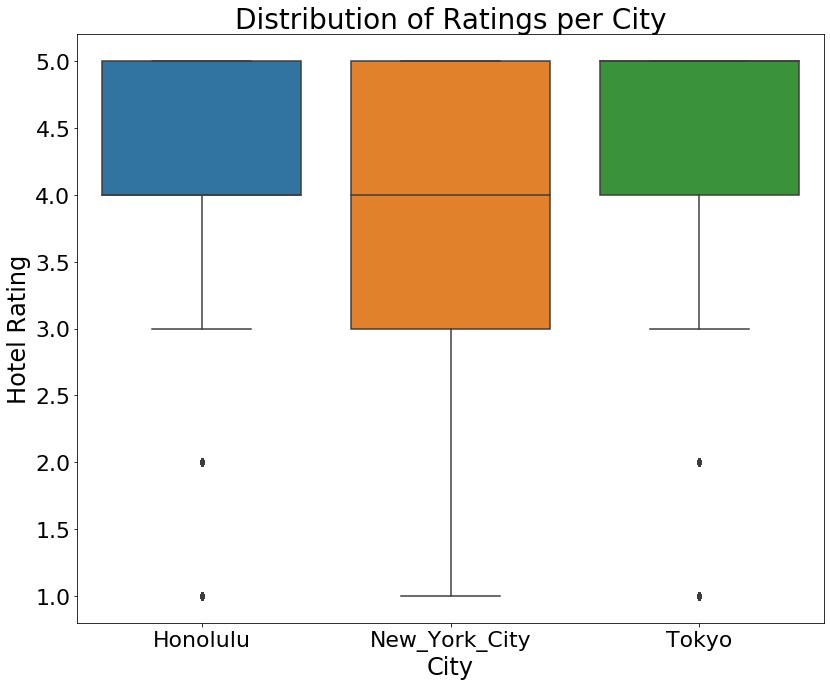

In [15]:
# Plot boxplot - Ratings per city
figsize=(12, 10)
fig, ax = plt.subplots(figsize=figsize)
plot = sns.boxplot(x='City', y='rating', data=df, ax=ax, order = df['City'].value_counts().index)
ax.set_title('Distribution of Ratings per City', size=BIGGEST_SIZE)
ax.set_ylabel('Hotel Rating')
ax.set_xlabel('City')
fig.tight_layout()
fig.savefig('../images/boxplt_ratings_byCity_full')

Total Number of Ratings:  212155


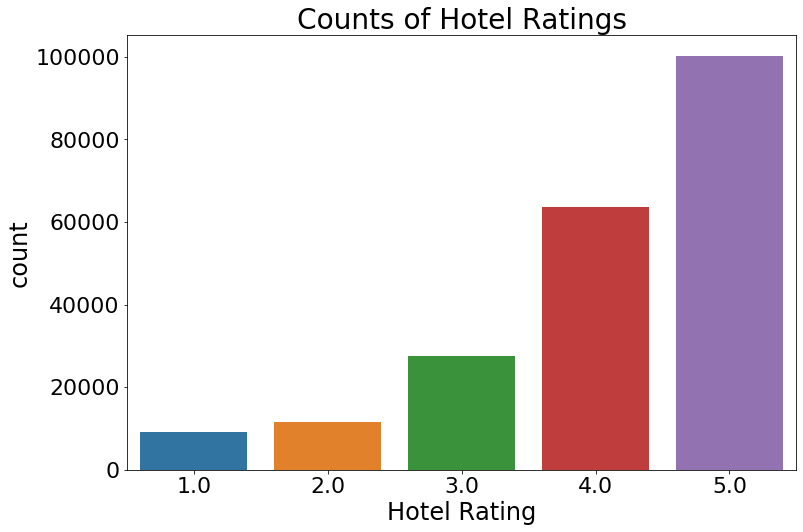

In [16]:
# Plot counts - Ratings
df = df_all_hotels_cleaned
print('Total Number of Ratings: ', df.shape[0])

fig, ax = plt.subplots(figsize=(12,8))
plot = sns.countplot(data=df, x='rating', ax=ax)
ax.set_title('Counts of Hotel Ratings', size=BIGGEST_SIZE)
ax.set_xlabel('Hotel Rating')
fig.savefig('../images/countplot_ratings_full')

Total Number of Ratings:  212155


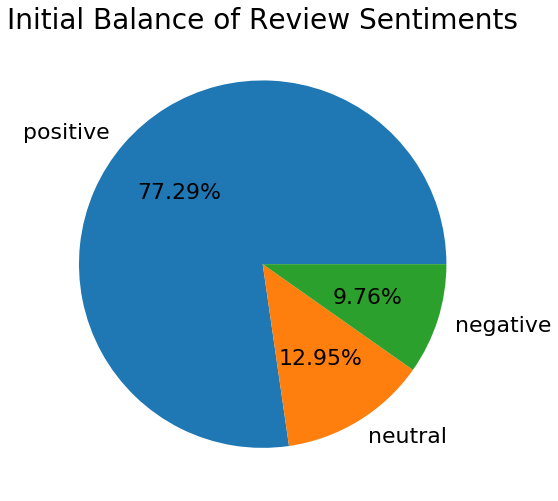

In [17]:
# Plot pie - Sentiments
df = df_all_hotels_cleaned
print('Total Number of Ratings: ', df.shape[0])

fig, ax = plt.subplots(figsize=(8,8))
hlp.plot_pie(df['sentiment'], fig, ax)
ax.set_title('Initial Balance of Review Sentiments', size=BIGGEST_SIZE)
ax.set_ylabel('')
fig.savefig('../images/pie_sentiments_full')

# Train-Test Split

In [18]:
# Specify df, target, indices, X & y
df = df_all_hotels_cleaned.copy()
target = 'sentiment'
indices = df.index

X = df['review_body']
y = df[target].to_numpy()

In [19]:
_, X_test, y_train, y_test, indices_train, indices_test = train_test_split(X, y, indices, test_size=0.2, shuffle=True, stratify=y)
indices_train.shape, indices_test.shape

((169724,), (42431,))

## Handling class imbalance by under-sampling train data

In [20]:
# Get train df with train indices
train_df = df.iloc[indices_train,:]
train_df.shape

(169724, 14)

In [21]:
# Get classes and counts
unique, counts = np.unique(y_train, return_counts=True)
unique, counts

(array(['negative', 'neutral', 'positive'], dtype=object),
 array([ 16566,  21984, 131174]))

In [22]:
# Determine majority, middle, and minority classes
majority_class = unique[np.argmax(counts)]
minority_class = unique[np.argmin(counts)]
mid_class = np.unique(y_train[(y_train!=majority_class) & (y_train!=minority_class)])[0]
print('Majority: {}, Middle: {}, Minority: {}'.format(majority_class, mid_class, minority_class))

Majority: positive, Middle: neutral, Minority: negative


In [23]:
# Get minority class indices
minority_class_indices = train_df[train_df[target]==minority_class].index
minority_class_len = minority_class_indices.shape[0]
minority_class_len

16566

In [24]:
# Get majority class indices
majority_class_indices = train_df[train_df[target]==majority_class].index
majority_class_indices

Int64Index([159677,  71377,  70608,  63113,  99457, 120710, 110851,  41488,
            160446, 200022,
            ...
            114810, 201319,  43249, 153274, 176086, 120535, 209144,  88718,
             93612,  83737],
           dtype='int64', length=131174)

In [25]:
# Get middle class indices
middle_class_indices = train_df[train_df[target]==mid_class].index
middle_class_indices

Int64Index([ 17530,  93901,  86748, 193314,  34854,  54638,  35135,  44541,
             87035, 177015,
            ...
              8808, 129370,  32154, 140946,  45887, 204549,  93267, 125171,
            188817,  83266],
           dtype='int64', length=21984)

In [26]:
# Randomly under-sample majority and middle class indices to get new under-sampled train df
rand_maj_indices = np.random.choice(majority_class_indices, minority_class_len, replace=False)
rand_mid_indices = np.random.choice(middle_class_indices, minority_class_len, replace=False)
undersample_indices = np.concatenate([minority_class_indices, rand_mid_indices, rand_maj_indices])

train_df_us = df.iloc[undersample_indices,:]
train_df_us.shape

(49698, 14)

Total Number of Ratings:  49698


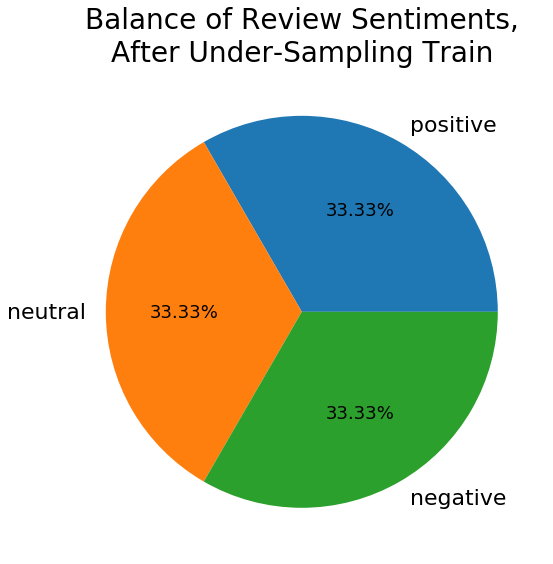

In [27]:
# Plot pie - Classes after undersampling
print('Total Number of Ratings: ', train_df_us.shape[0])

fig, ax = plt.subplots(figsize=(8,8))
hlp.plot_pie(train_df_us[target], fig, ax)
ax.set_title('Balance of Review Sentiments,\nAfter Under-Sampling Train', size=BIGGEST_SIZE)
ax.set_ylabel('')
fig.savefig('../images/pie_sentiments_train_undersample')

In [28]:
X_train_us = train_df_us['review_body']
y_train_us = train_df_us[target].to_numpy()

# NLP & Predictive Modeling

In [75]:
from nltk.corpus import stopwords
from nltk.tokenize import RegexpTokenizer
from nltk.stem.porter import PorterStemmer
from nltk.stem.snowball import SnowballStemmer
from nltk.stem.wordnet import WordNetLemmatizer
from sklearn.feature_extraction.text import TfidfVectorizer, CountVectorizer
import nltk
# nltk.download('stopwords')
import nltk
# nltk.download('wordnet')

from sklearn.naive_bayes import MultinomialNB
from sklearn.linear_model import LogisticRegression

from sklearn.model_selection import cross_val_score

In [78]:
nb_def = MultinomialNB()
lr_newton = LogisticRegression(multi_class='multinomial', solver="newton-cg")

### Tf-idf, no stemmer, 200 max_features (filter English stopwords)

In [31]:
tfidf=True
stemmer=None
max_features=200

vect_tfidf_nostem_200, vocab_tfidf_nostem_200 = hlp.build_text_vectorizer(X_train_us,
                             use_tfidf=tfidf,
                             use_stemmer=stemmer,
                             max_features=max_features)

Vectorizer: TfidfVectorizer
No Stemmer
Max features: 200


/opt/conda/lib/python3.7/site-packages/sklearn/feature_extraction/text.py:507: UserWarning: The parameter 'token_pattern' will not be used since 'tokenizer' is not None'
  warnings.warn("The parameter 'token_pattern' will not be used"


In [32]:
Xtr_tfidf_nostem_200 = vect_tfidf_nostem_200(X_train_us)

In [33]:
vocab_tfidf_nostem_200

array(['across', 'air', 'also', 'although', 'always', 'amazing',
       'another', 'area', 'around', 'arrived', 'asked', 'available',
       'away', 'back', 'bad', 'balcony', 'bar', 'bathroom', 'beach',
       'beautiful', 'bed', 'beds', 'best', 'better', 'big', 'bit',
       'booked', 'breakfast', 'business', 'called', 'came', 'car',
       'charge', 'check', 'checked', 'city', 'clean', 'close', 'coffee',
       'come', 'comfortable', 'could', 'day', 'days', 'definitely',
       'desk', 'door', 'early', 'elevator', 'end', 'enough', 'etc',
       'even', 'ever', 'every', 'everything', 'excellent', 'expensive',
       'experience', 'extra', 'family', 'fee', 'feel', 'find', 'first',
       'floor', 'food', 'found', 'free', 'friendly', 'front', 'full',
       'get', 'given', 'go', 'going', 'good', 'got', 'great', 'guests',
       'hawaii', 'hawaiian', 'head', 'helpful', 'high', 'hilton', 'hotel',
       'hotels', 'hour', 'hours', 'however', 'know', 'large', 'last',
       'left', 'like', 

In [34]:
hlp.fit_pred_score_Nfold(nb_def, Xtr_tfidf_nostem_200, y_train_us, N=10)

MultinomialNB accuracy, 10-fold CV on Train Data: 0.642


### Tf-idf, porter stemmer, 200 max_features (filter English stopwords)

In [35]:
tfidf=True
stemmer='porter'
max_features=200

vect_tfidf_port_200, vocab_tfidf_port_200 = hlp.build_text_vectorizer(X_train_us,
                             use_tfidf=tfidf,
                             use_stemmer=stemmer,
                             max_features=max_features)

Vectorizer: TfidfVectorizer
Using PorterStemmer
Max features: 200


/opt/conda/lib/python3.7/site-packages/sklearn/feature_extraction/text.py:507: UserWarning: The parameter 'token_pattern' will not be used since 'tokenizer' is not None'
  warnings.warn("The parameter 'token_pattern' will not be used"


In [36]:
Xtr_tfidf_port_200 = vect_tfidf_port_200(X_train_us)

In [37]:
vocab_tfidf_port_200

array(['across', 'also', 'alway', 'anoth', 'area', 'around', 'arriv',
       'ask', 'avail', 'away', 'back', 'bad', 'balconi', 'bar',
       'bathroom', 'beach', 'beauti', 'bed', 'best', 'better', 'big',
       'bit', 'block', 'book', 'breakfast', 'build', 'busi', 'call',
       'car', 'chair', 'charg', 'check', 'citi', 'clean', 'close',
       'coffe', 'come', 'comfort', 'could', 'day', 'definit', 'desk',
       'disappoint', 'door', 'drink', 'earli', 'elev', 'end', 'enjoy',
       'enough', 'etc', 'even', 'everi', 'everyth', 'excel', 'expect',
       'expens', 'experi', 'extra', 'famili', 'fee', 'feel', 'find',
       'first', 'floor', 'food', 'found', 'free', 'friendli', 'front',
       'get', 'give', 'go', 'good', 'got', 'great', 'guest', 'hawaii',
       'head', 'help', 'high', 'hilton', 'hotel', 'hour', 'howev',
       'includ', 'issu', 'know', 'larg', 'last', 'left', 'like', 'line',
       'littl', 'lobbi', 'locat', 'long', 'look', 'lot', 'loung', 'love',
       'made', 'make', 

In [38]:
hlp.fit_pred_score_Nfold(nb_def, Xtr_tfidf_port_200, y_train_us, N=10)

MultinomialNB accuracy, 10-fold CV on Train Data: 0.648


### Tf-idf, snowball stemmer, 200 max_features (filter English stopwords)

In [39]:
tfidf=True
stemmer='snowball'
max_features=200

vect_tfidf_snow_200, vocab_tfidf_snow_200 = hlp.build_text_vectorizer(X_train_us,
                             use_tfidf=tfidf,
                             use_stemmer=stemmer,
                             max_features=max_features)

Vectorizer: TfidfVectorizer
Using SnowballStemmer
Max features: 200


/opt/conda/lib/python3.7/site-packages/sklearn/feature_extraction/text.py:507: UserWarning: The parameter 'token_pattern' will not be used since 'tokenizer' is not None'
  warnings.warn("The parameter 'token_pattern' will not be used"


In [40]:
Xtr_tfidf_snow_200 = vect_tfidf_snow_200(X_train_us)

In [41]:
vocab_tfidf_snow_200

array(['across', 'also', 'alway', 'anoth', 'area', 'around', 'arriv',
       'ask', 'avail', 'away', 'back', 'bad', 'balconi', 'bar',
       'bathroom', 'beach', 'beauti', 'bed', 'best', 'better', 'big',
       'bit', 'block', 'book', 'breakfast', 'build', 'busi', 'call',
       'car', 'chair', 'charg', 'check', 'citi', 'clean', 'close',
       'coffe', 'come', 'comfort', 'could', 'day', 'definit', 'desk',
       'disappoint', 'door', 'drink', 'earli', 'elev', 'end', 'enjoy',
       'enough', 'etc', 'even', 'everi', 'everyth', 'excel', 'expect',
       'expens', 'experi', 'extra', 'famili', 'fee', 'feel', 'find',
       'first', 'floor', 'food', 'found', 'free', 'friend', 'front',
       'get', 'give', 'go', 'good', 'got', 'great', 'guest', 'hawaii',
       'head', 'help', 'high', 'hilton', 'hotel', 'hour', 'howev',
       'includ', 'issu', 'know', 'larg', 'last', 'left', 'like', 'line',
       'littl', 'lobbi', 'locat', 'long', 'look', 'lot', 'loung', 'love',
       'made', 'make', 'm

In [42]:
hlp.fit_pred_score_Nfold(nb_def, Xtr_tfidf_snow_200, y_train_us, N=10)

MultinomialNB accuracy, 10-fold CV on Train Data: 0.648


### Tf-idf, wordnet lemmatizer, 200 max_features (filter English stopwords)

In [43]:
tfidf=True
stemmer='lem'
max_features=200

vect_tfidf_lem_200, vocab_tfidf_lem_200 = hlp.build_text_vectorizer(X_train_us,
                             use_tfidf=tfidf,
                             use_stemmer=stemmer,
                             max_features=max_features)

Vectorizer: TfidfVectorizer
Using WordNetLemmatizer
Max features: 200


/opt/conda/lib/python3.7/site-packages/sklearn/feature_extraction/text.py:507: UserWarning: The parameter 'token_pattern' will not be used since 'tokenizer' is not None'
  warnings.warn("The parameter 'token_pattern' will not be used"


In [44]:
Xtr_tfidf_lem_200 = vect_tfidf_lem_200(X_train_us)

In [45]:
vocab_tfidf_lem_200

array(['across', 'air', 'also', 'always', 'another', 'area', 'around',
       'arrived', 'asked', 'available', 'away', 'back', 'bad', 'balcony',
       'bar', 'bathroom', 'beach', 'beautiful', 'bed', 'best', 'better',
       'big', 'bit', 'block', 'booked', 'breakfast', 'building',
       'business', 'call', 'called', 'came', 'car', 'chair', 'charge',
       'check', 'checked', 'city', 'clean', 'close', 'coffee', 'come',
       'comfortable', 'could', 'day', 'definitely', 'desk', 'door',
       'drink', 'early', 'elevator', 'end', 'enough', 'etc', 'even',
       'ever', 'every', 'everything', 'excellent', 'expensive',
       'experience', 'extra', 'family', 'fee', 'feel', 'find', 'first',
       'floor', 'food', 'found', 'free', 'friendly', 'front', 'full',
       'get', 'given', 'go', 'going', 'good', 'got', 'great', 'guest',
       'hawaii', 'helpful', 'high', 'hilton', 'hotel', 'hour', 'however',
       'issue', 'know', 'large', 'last', 'left', 'like', 'line', 'little',
       'lobb

In [46]:
hlp.fit_pred_score_Nfold(nb_def, Xtr_tfidf_lem_200, y_train_us, N=10)

MultinomialNB accuracy, 10-fold CV on Train Data: 0.642


## Increased max_features (max_features=None)

### Tf-idf, no stemmer, None max_features (filter English stopwords)

In [47]:
tfidf=True
stemmer=None
max_features=None

vect_tfidf_nostem_none, vocab_tfidf_nostem_none = hlp.build_text_vectorizer(X_train_us,
                             use_tfidf=tfidf,
                             use_stemmer=stemmer,
                             max_features=max_features)

Vectorizer: TfidfVectorizer
No Stemmer
Max features: None


/opt/conda/lib/python3.7/site-packages/sklearn/feature_extraction/text.py:507: UserWarning: The parameter 'token_pattern' will not be used since 'tokenizer' is not None'
  warnings.warn("The parameter 'token_pattern' will not be used"


In [48]:
vocab_tfidf_nostem_none.shape[0]

50095

In [49]:
Xtr_tfidf_nostem_none = vect_tfidf_nostem_none(X_train_us)

In [50]:
vocab_tfidf_nostem_none

array(['aa', 'aaa', 'aaaaaaa', ..., 'zyi', 'zyrtec', 'zzz'], dtype='<U155')

In [51]:
hlp.fit_pred_score_Nfold(nb_def, Xtr_tfidf_nostem_none, y_train_us, N=10)

MultinomialNB accuracy, 10-fold CV on Train Data: 0.724


### Tf-idf, porter stemmer, None max_features (filter English stopwords)

In [52]:
tfidf=True
stemmer='porter'
max_features=None

vect_tfidf_port_none, vocab_tfidf_port_none = hlp.build_text_vectorizer(X_train_us,
                             use_tfidf=tfidf,
                             use_stemmer=stemmer,
                             max_features=max_features)

Vectorizer: TfidfVectorizer
Using PorterStemmer
Max features: None


/opt/conda/lib/python3.7/site-packages/sklearn/feature_extraction/text.py:507: UserWarning: The parameter 'token_pattern' will not be used since 'tokenizer' is not None'
  warnings.warn("The parameter 'token_pattern' will not be used"


In [53]:
Xtr_tfidf_port_none = vect_tfidf_port_none(X_train_us)

In [54]:
vocab_tfidf_port_none

array(['aa', 'aaa', 'aaaaaaa', ..., 'zyi', 'zyrtec', 'zzz'], dtype='<U155')

In [55]:
hlp.fit_pred_score_Nfold(nb_def, Xtr_tfidf_port_none, y_train_us, N=10)

MultinomialNB accuracy, 10-fold CV on Train Data: 0.722


### Tf-idf, snowball stemmer, None max_features (filter English stopwords)

In [56]:
tfidf=True
stemmer='snowball'
max_features=None

vect_tfidf_snow_none, vocab_tfidf_snow_none = hlp.build_text_vectorizer(X_train_us,
                             use_tfidf=tfidf,
                             use_stemmer=stemmer,
                             max_features=max_features)

Vectorizer: TfidfVectorizer
Using SnowballStemmer
Max features: None


/opt/conda/lib/python3.7/site-packages/sklearn/feature_extraction/text.py:507: UserWarning: The parameter 'token_pattern' will not be used since 'tokenizer' is not None'
  warnings.warn("The parameter 'token_pattern' will not be used"


In [57]:
Xtr_tfidf_snow_none = vect_tfidf_snow_none(X_train_us)

In [58]:
vocab_tfidf_snow_none

array(['aa', 'aaa', 'aaaaaaa', ..., 'zyi', 'zyrtec', 'zzz'], dtype='<U155')

In [59]:
hlp.fit_pred_score_Nfold(nb_def, Xtr_tfidf_snow_none, y_train_us, N=10)

MultinomialNB accuracy, 10-fold CV on Train Data: 0.722


### Tf-idf, wordnet lemmatizer, None max_features (filter English stopwords)

In [65]:
tfidf=True
stemmer='lem'
max_features=None

vect_tfidf_lem_none, vocab_tfidf_lem_none = hlp.build_text_vectorizer(X_train_us,
                             use_tfidf=tfidf,
                             use_stemmer=stemmer,
                             max_features=max_features)

Vectorizer: TfidfVectorizer
Using WordNetLemmatizer
Max features: None


/opt/conda/lib/python3.7/site-packages/sklearn/feature_extraction/text.py:507: UserWarning: The parameter 'token_pattern' will not be used since 'tokenizer' is not None'
  warnings.warn("The parameter 'token_pattern' will not be used"


In [66]:
Xtr_tfidf_lem_none = vect_tfidf_lem_none(X_train_us)

In [67]:
vocab_tfidf_lem_none

array(['aa', 'aaa', 'aaaaaaa', ..., 'zyi', 'zyrtec', 'zzz'], dtype='<U155')

In [68]:
hlp.fit_pred_score_Nfold(nb_def, Xtr_tfidf_lem_none, y_train_us, N=10)

MultinomialNB accuracy, 10-fold CV on Train Data: 0.725


### CountVectorizer, wordnet lemmatizer, None max_features (filter English stopwords)

In [69]:
tfidf=False
stemmer='lem'
max_features=None

vect_count_lem_none, vocab_count_lem_none = hlp.build_text_vectorizer(X_train_us,
                             use_tfidf=tfidf,
                             use_stemmer=stemmer,
                             max_features=max_features)

Vectorizer: CountVectorizer
Using WordNetLemmatizer
Max features: None


/opt/conda/lib/python3.7/site-packages/sklearn/feature_extraction/text.py:507: UserWarning: The parameter 'token_pattern' will not be used since 'tokenizer' is not None'
  warnings.warn("The parameter 'token_pattern' will not be used"


In [70]:
Xtr_count_lem_none = vect_count_lem_none(X_train_us)

In [71]:
vocab_count_lem_none

array(['aa', 'aaa', 'aaaaaaa', ..., 'zyi', 'zyrtec', 'zzz'], dtype='<U155')

In [72]:
hlp.fit_pred_score_Nfold(nb_def, Xtr_count_lem_none, y_train_us, N=10)

MultinomialNB accuracy, 10-fold CV on Train Data: 0.722


# Appendix

In [64]:
# don't go beyond here with Run All
assert False

AssertionError: 

In [ ]:
# Plot distributions - Review length per sentiment
df = df_all_hotels_cleaned

fig, ax = plt.subplots(figsize=(8,8))
# Plot per sentiment
for sentiment in df['sentiment'].unique():
    sns.distplot(df.groupby('sentiment').get_group(sentiment)['review_length'], ax=ax, label=sentiment)
ax.legend()

In [ ]:
# Plot distributions - Review length per city
df = df_all_hotels_cleaned

fig, ax = plt.subplots(figsize=(8,8))
# Plot per city
for city in df['City'].unique():
    sns.distplot(df.groupby('City').get_group(city)['review_length'], ax=ax, label=city)
ax.legend()